In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
df = pd.read_csv('train.csv')

In [3]:
train = df.drop(['textID','text'],axis=1)

In [4]:
train.selected_text.fillna('No text',inplace=True)

In [5]:
def cleantext(text):
    text = re.sub(r'@[A-Za-z0-9]+','', text) #remove mentions
    text = re.sub(r'#','', text) #remove hash
    text = re.sub(r'https?:\/\/\S+', '', text) #remove hyperlink
    text = re.sub('\s+', ' ', text) #remove new line char
    text = re.sub("\'", "", text) #remove single quotes
    
    return text

In [6]:
train["selected_text"] = train["selected_text"].apply(cleantext)

In [7]:
train["selected_text"].head(15)

0                   I`d have responded, if I were going
1                                              Sooo SAD
2                                           bullying me
3                                        leave me alone
4                                         Sons of ****,
5      - some shameless plugging for the best Ranger...
6                                                   fun
7                                            Soooo high
8                                           Both of you
9                          Wow... u just became cooler.
10    as much as i love to be hopeful, i reckon the ...
11                                                 like
12                                          DANGERously
13                                                 lost
14                           test test from the LG enV2
Name: selected_text, dtype: object

In [8]:
import string
train["selected_text"] = train["selected_text"].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])

In [9]:
train["selected_text"] = train["selected_text"].apply(lambda wrd: ''.join(wrd))

In [10]:
train["selected_text"]

0                        id have responded if i were going
1                                                 sooo sad
2                                              bullying me
3                                           leave me alone
4                                                 sons of 
                               ...                        
27476                                               d lost
27477                                           dont force
27478                             yay good for both of you
27479                                 but it was worth it 
27480    all this flirting going on  the atg smiles yay...
Name: selected_text, Length: 27481, dtype: object

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
from nltk.corpus import stopwords

In [13]:
train["selected_text"][:50] = train["selected_text"][:50].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words("english")]))

In [14]:
train["selected_text"]

0                                       id responded going
1                                                 sooo sad
2                                                 bullying
3                                              leave alone
4                                                     sons
                               ...                        
27476                                               d lost
27477                                           dont force
27478                             yay good for both of you
27479                                 but it was worth it 
27480    all this flirting going on  the atg smiles yay...
Name: selected_text, Length: 27481, dtype: object

In [15]:
import gensim
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence),     deacc=True))

In [16]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [17]:
temp = []
data_to_list = train['selected_text'].values.tolist()
for i in range(len(data_to_list)):
    temp.append(data_to_list[i])
data_wordslem = list(sent_to_words(temp))

In [18]:
import nltk
lemmatizer = nltk.stem.WordNetLemmatizer()

In [19]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [20]:
for i in range(len(data_wordslem)):
    for j in range(len(data_wordslem[i])):
        data_wordslem[i][j] = lemmatizer.lemmatize(data_wordslem[i][j],pos="v")

In [21]:
data = []
for i in range(len(data_wordslem)):
    data.append(detokenize(data_wordslem[i]))
print(data[:5])

['id respond go', 'sooo sad', 'bully', 'leave alone', 'sons']


In [22]:
import keras

In [23]:
from keras.models import Sequential
from keras.preprocessing import image as image_utils
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn.model_selection import train_test_split

In [24]:
from keras.utils import pad_sequences

In [25]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  290 1026   15]
 [   0    0    0 ...    0  399   64]
 [   0    0    0 ...    0    0 3103]
 ...
 [   0    0    0 ...  379   12    5]
 [   0    0    0 ...    1  533    8]
 [   0    0    0 ...  548  196  398]]


In [26]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

In [27]:
from keras.models import Sequential
from keras import layers

model2 = Sequential()
model2.add(layers.Embedding(max_words, 40, input_length=max_len))
model2.add(layers.Bidirectional(layers.LSTM(20,dropout=0.6)))
model2.add(layers.Dense(3,activation='softmax'))

In [28]:
model2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
import tensorflow as tf
labels = np.array(train['sentiment'])
y = []
for i in range(len(labels)):
    if labels[i] == 'neutral':
        y.append(0)
    if labels[i] == 'negative':
        y.append(1)
    if labels[i] == 'positive':
        y.append(2)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")
del y

In [ ]:
history = model2.fit(x = tweets, y= labels, epochs=70,validation_split=0.2)

Epoch 1/70
687/687 [==============================] - 120s 169ms/step - loss: 0.7122 - accuracy: 0.7001 - val_loss: 0.5302 - val_accuracy: 0.7944
Epoch 2/70
687/687 [==============================] - 128s 186ms/step - loss: 0.4721 - accuracy: 0.8205 - val_loss: 0.4556 - val_accuracy: 0.8292
Epoch 3/70
687/687 [==============================] - 104s 151ms/step - loss: 0.4031 - accuracy: 0.8491 - val_loss: 0.4369 - val_accuracy: 0.8399
Epoch 4/70
687/687 [==============================] - 92s 134ms/step - loss: 0.3664 - accuracy: 0.8651 - val_loss: 0.4404 - val_accuracy: 0.8346
Epoch 5/70
687/687 [==============================] - 91s 133ms/step - loss: 0.3424 - accuracy: 0.8738 - val_loss: 0.4363 - val_accuracy: 0.8414
Epoch 6/70
687/687 [==============================] - 92s 134ms/step - loss: 0.3242 - accuracy: 0.8790 - val_loss: 0.4464 - val_accuracy: 0.8334
Epoch 7/70
687/687 [==============================] - 96s 140ms/step - loss: 0.3095 - accuracy: 0.8855 - val_loss: 0.4448 - val

In [30]:
import matplotlib.pyplot as plt

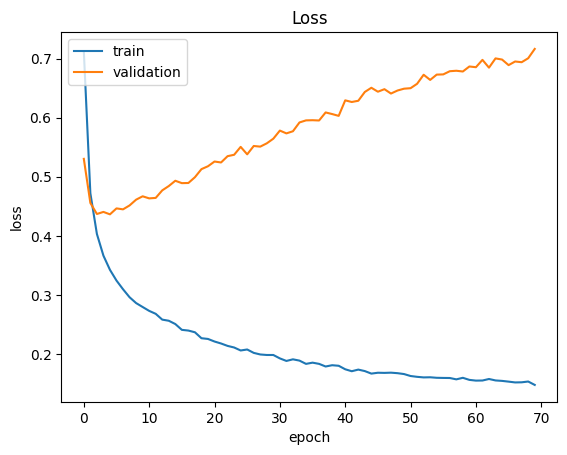

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

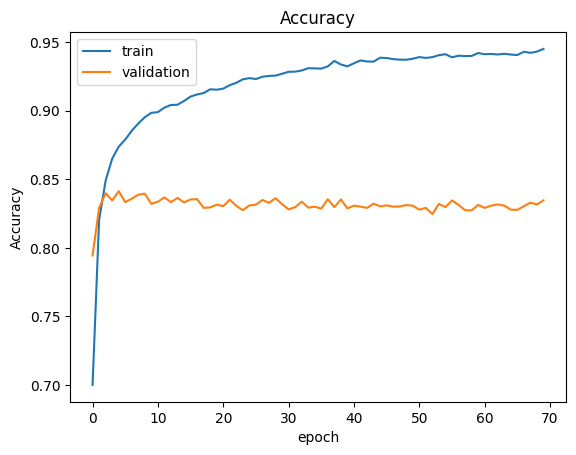

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [31]:
sentiment = ['Neutral','Negative','Positive']

In [ ]:
sequence = tokenizer.texts_to_sequences(['this experience has been the worst, very bad product'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 1s 1s/step


'Negative'

In [ ]:
sequence = tokenizer.texts_to_sequences(['i really love this internship'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 66ms/step


'Positive'

In [ ]:
sequence = tokenizer.texts_to_sequences(['i love sayabidevs'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 38ms/step


'Positive'

In [ ]:
sequence = tokenizer.texts_to_sequences(['I go to gym daily'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 39ms/step


'Neutral'

Regularisatuion

In [32]:
model = Sequential()
model.add(layers.Embedding(max_words, 40, input_length=max_len))
model.add(layers.BatchNormalization())
model.add(layers.Bidirectional(layers.LSTM(15,dropout=0.6)))
model.add(layers.Dense(3,activation='softmax'))

In [33]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
history2 = model.fit(x = tweets, y= labels, epochs=50,validation_split=0.2)

Epoch 1/50
687/687 [==============================] - 107s 146ms/step - loss: 0.7299 - accuracy: 0.6891 - val_loss: 0.5647 - val_accuracy: 0.7706
Epoch 2/50
687/687 [==============================] - 96s 140ms/step - loss: 0.5387 - accuracy: 0.7881 - val_loss: 0.5294 - val_accuracy: 0.7850
Epoch 3/50
687/687 [==============================] - 98s 143ms/step - loss: 0.4830 - accuracy: 0.8143 - val_loss: 0.6006 - val_accuracy: 0.7855
Epoch 4/50
687/687 [==============================] - 90s 132ms/step - loss: 0.4550 - accuracy: 0.8287 - val_loss: 0.4618 - val_accuracy: 0.8259
Epoch 5/50
687/687 [==============================] - 91s 132ms/step - loss: 0.4337 - accuracy: 0.8355 - val_loss: 0.8520 - val_accuracy: 0.7198
Epoch 6/50
687/687 [==============================] - 92s 134ms/step - loss: 0.4228 - accuracy: 0.8421 - val_loss: 0.4467 - val_accuracy: 0.8328
Epoch 7/50
687/687 [==============================] - 90s 132ms/step - loss: 0.4108 - accuracy: 0.8480 - val_loss: 0.4445 - val_a

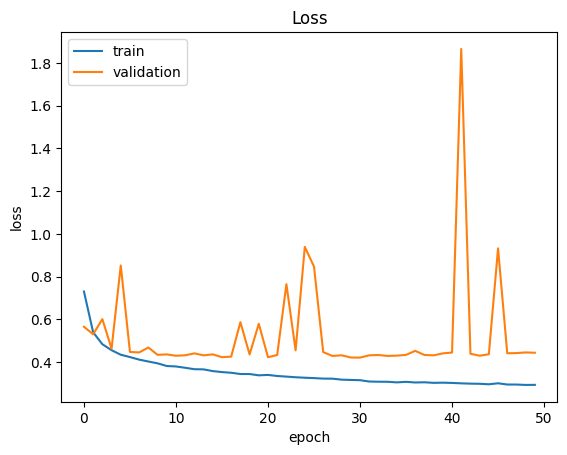

In [35]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

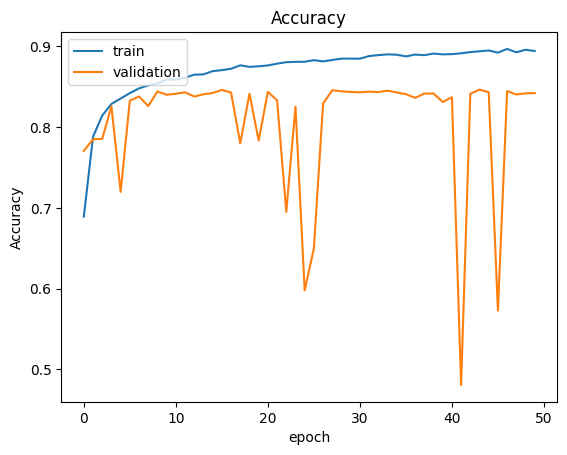

In [36]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [37]:
sequence = tokenizer.texts_to_sequences(['i like this product'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 1s 1s/step


'Positive'

In [38]:
sequence = tokenizer.texts_to_sequences(['i dont like this product'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 60ms/step


'Negative'

In [39]:
sequence = tokenizer.texts_to_sequences(['this is a random sentence'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 67ms/step


'Neutral'